# Facial Emotion Recognition using basic architecture models (without dense layers) 

## About the dataset
A private dataset, contains 38 subjects, each has 7 images where each image for a certain emotion class giving total of 266 image 38 image per class

## Importing needed libraries

In [175]:
import cv2
import pandas as pd
import numpy as np
import scikitplot
import random
import seaborn as sns
import keras
import os
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import warnings
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D,Activation,Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
warnings.simplefilter("ignore")
from keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.regularizers import l1, l2
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Loading the data

In [176]:
os.listdir('/kaggle/input/emotions-dataset/emotions dataset/01-Sohaila')

['surprise.JPG',
 'disgust.JPG',
 'anger.JPG',
 'sadness.JPG',
 'neutral.JPG',
 'happiness.JPG',
 'fear.JPG']

In [177]:
BASE_URL = '/kaggle/input/emotions-dataset'

In [178]:
# Define the path to the root folder
path = '/kaggle/input/emotions-dataset/emotions dataset'

# Initialize a list to store image data as tuples
image_data = []

# Create a mapping from string labels (emotions) to class numbers
emotion_to_class = {'anger': 1, 'fear': 2, 'happiness': 3, 'sadness': 4, 'surprise': 5, 'neutral': 6, 'disgust': 7}

# Loop through the subfolders
for folder_name in os.listdir(path):
    folder_path = os.path.join(path, folder_name)
    if os.path.isdir(folder_path):
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
            if os.path.isfile(image_path) and not image_path.lower().endswith(('.heic', '.HEIC')):
                # Read the image
                image = cv2.imread(image_path)                
                # Extract emotion label from the image name
                emotion_label = os.path.splitext(image_name)[0]
                if emotion_label== "surprised":
                    emotion_label= 'surprise'
                if emotion_label== "sad":
                    emotion_label= 'sadness'
                # Convert the emotion label to class number using the mapping
                class_number = emotion_to_class.get(emotion_label.lower(), -1)  # -1 as a default value if the label is not in the mapping
                
                # Store image and label as a tuple in the list
                image_data.append((image, class_number))

# Display the length of the collected image data
print("Total images collected:", len(image_data))

In [ ]:
# Define the output directory
output_dir = '/kaggle/working/shuffled data with labels'

# Create a mapping from class numbers to string labels (emotions)
class_to_emotion = {1:'anger', 2:'fear', 3:'happiness',  4:'sadness',  5:'surprise',  6:'neutral', 7:'disgust'}

# Function to save images to directories
def save_images(data, directory):
    for image, emotion in data:
        # Convert class number to emotion label
        emotion_label = class_to_emotion.get(emotion, 'Unknown')
        
        # Create directories based on emotion labels in the output directory
        emotion_dir = os.path.join(directory, emotion_label)
        os.makedirs(emotion_dir, exist_ok=True)

        # Save images to respective emotion directories
        filename = f"{random.randint(0, 1000000)}.jpg"  # Random filename to prevent conflicts
        image_path = os.path.join(emotion_dir, filename)
        cv2.imwrite(image_path, image)

# Save images to the main directory "shuffled data with labels"
save_images(image_data, output_dir)

## Splitting the data

In [179]:
# Shuffle the data
random_seed = 42  # You can choose any seed for reproducibility
np.random.seed(random_seed)
np.random.shuffle(image_data)

# Split the data into training and testing sets
train_data, test_data = train_test_split(image_data, test_size=0.3, random_state=random_seed)

# Display the length of the collected image data
print("Total images collected:", len(image_data))
print("Train set size:", len(train_data))
print("Test set size:", len(test_data))


Total images collected: 266
Train set size: 186
Test set size: 80


## Data Augmentation

In [180]:
# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [181]:
# You can now use datagen.flow for training and testing data
train_generator = datagen.flow(
    x=np.array([data[0] for data in train_data]),  # array of training images
    y=np.array([data[1] for data in train_data]),  # array of training labels
    batch_size=32,
    shuffle=True
)

In [182]:
test_generator = datagen.flow(
    x=np.array([data[0] for data in test_data]),   # array of testing images
    y=np.array([data[1] for data in test_data]),   # array of testing labels
    batch_size=32,
    shuffle=False  # Do not shuffle the test data
)

## Building Model

In [183]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D

# Define a simple CNN model without dense layers
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(GlobalAveragePooling2D())
model.add(Dense(8, activation='softmax'))  # Assuming 7 emotions

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# display the model summary
model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 31, 31, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 6, 6, 64)        

## Training Model

In [184]:
# Assuming train_data and test_data are lists of tuples (image, one-hot label)
history = model.fit(
    x=np.array([data[0] for data in train_data]),
    y=np.array([data[1] for data in train_data]),
    epochs=5,
    steps_per_epoch=len(train_data) // 32,
    validation_data=(np.array([data[0] for data in test_data]), np.array([data[1] for data in test_data])),
    validation_steps=len(test_data) // 32
)

# # Train the model
# history = model.fit(train_generator, epochs=5, steps_per_epoch=len(train_data)//32, validation_data=test_generator, validation_steps=len(test_data)//32)

Epoch 1/5
5/5 [==============================] - 3s 132ms/step - loss: 25.0805 - accuracy: 0.1183 - val_loss: 11.8599 - val_accuracy: 0.0875
Epoch 2/5
5/5 [==============================] - 0s 11ms/step - loss: 9.8023 - accuracy: 0.1344 - val_loss: 5.5115 - val_accuracy: 0.1125
Epoch 3/5
5/5 [==============================] - 0s 11ms/step - loss: 5.5498 - accuracy: 0.1183 - val_loss: 4.9370 - val_accuracy: 0.1250
Epoch 4/5
5/5 [==============================] - 0s 11ms/step - loss: 3.4729 - accuracy: 0.1290 - val_loss: 3.4197 - val_accuracy: 0.1000
Epoch 5/5
5/5 [==============================] - 0s 11ms/step - loss: 2.9015 - accuracy: 0.1989 - val_loss: 2.7039 - val_accuracy: 0.1250


## Results

### Accuracy

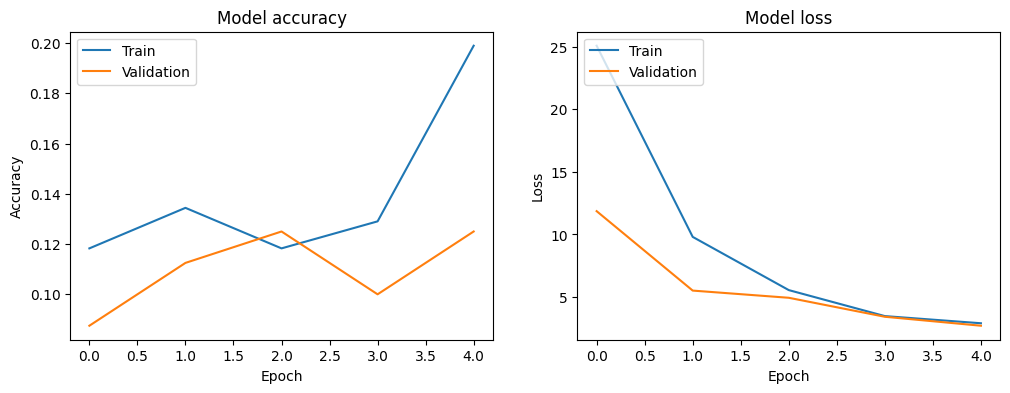

In [185]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

### Confusion Matrix

3/3 [==============================] - 0s 39ms/step


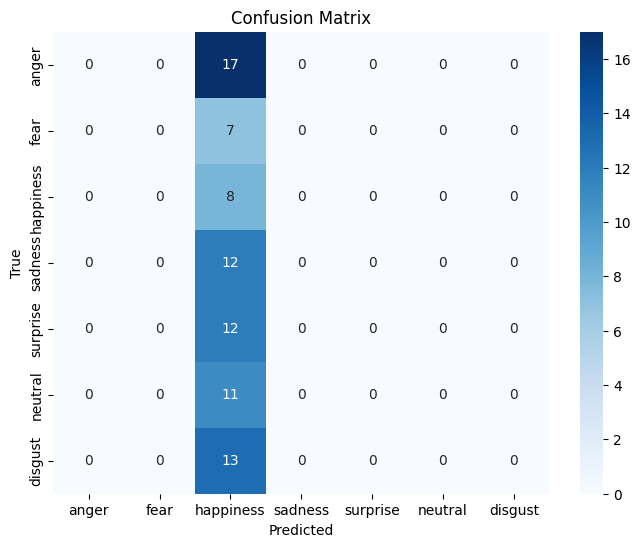

In [186]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Generate predictions on the test data
y_pred = model.predict(test_generator)

# Convert one-hot encoded labels to class predictions
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(np.array([data[1] for data in test_data]), axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=emotion_to_class.keys(), yticklabels=emotion_to_class.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### ROC Curve

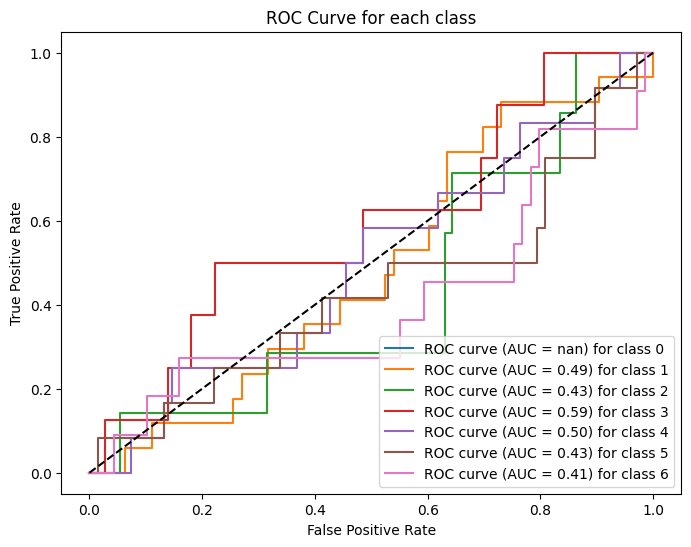

In [187]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(emotion_to_class)):
    fpr[i], tpr[i], _ = roc_curve(y_true_classes == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(len(emotion_to_class)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (AUC = {roc_auc[i]:.2f}) for class {i}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for each class')
plt.legend(loc='lower right')
plt.show()

## Trial

In [188]:
import cv2
import numpy as np

# Load and preprocess a new image for testing
test_image_path = '/kaggle/input/emotions-dataset/emotions dataset/01-Sohaila/anger.JPG'  # Replace with the path to your test image
img = cv2.imread(test_image_path, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (64, 64))
img = img.astype('float32') / 255.0
img = np.expand_dims(img, axis=0)  # Add batch dimension

# Make predictions
predictions = model.predict(img)

# Convert predictions to class labels
predicted_class = np.argmax(predictions)

# Map the predicted class index to the corresponding emotion label
emotion_labels = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
predicted_emotion = emotion_labels[predicted_class]

# Print the predicted emotion
print(f'Predicted Emotion: {predicted_emotion}')


1/1 [==============================] - 0s 153ms/step
Predicted Emotion: Happy
